# Bank customer churn

***
kaggle dataset exploratory data analysis
***

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Stage 1
***
WHY?
***
1. Understand data shape
2. learn useful features
3. Inform data cleaning

### Loading dataset

In [ ]:
# load dataset
data = pd.read_csv("Churn Modeling.csv")

# inspect data shape
rows, columns = data.shape
print(f"This dataset includes {rows} rows and {columns} attributes.")

This dataset includes 10000 rows and 14 attributes.


In [ ]:
# preview data
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


At first glance, it looks like there a few columns that do not qualify as features these are:
1. RowNumber
2. CustomerId
3. Exited (predictor)
4. Probably the Surname

The following are categorical variables
- Geography
- Gender
- HasCrCard
- IsActiveMember

Exited correspond to the class (1 if customer churned and 0 otherwise)

### Exploring the predictor variable

In [ ]:
# first, lets separate the inputs (features) from the target variable.
y = data["Exited"]
# y
print(y.value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


In [ ]:
# check for duplicated rows
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


No duplicates in this dataset

We have 7963 active customers and 2037 churned customers


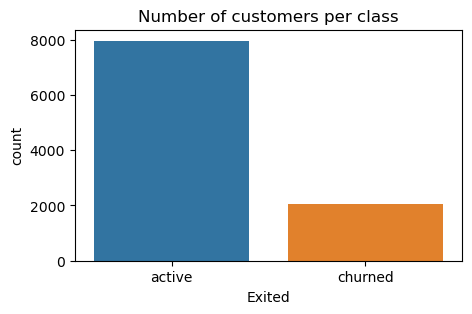

In [ ]:
# let's visualize the value counts for the target variable
active, churned = y.value_counts()

plt.figure(figsize=(5,3))
ax = sns.countplot(x=y)
plt.title("Number of customers per class")
ax.set_xticklabels(["active", "churned"]);

print(f"We have {active} active customers and {churned} churned customers")

From the plot above, it is vivid that we have a huge class imbalance

### Exploring the feature variables

In [ ]:
# exclude non-feature variables
columns_to_drop = ["RowNumber", "CustomerId", "Exited", "Surname"]
x = data.drop(columns_to_drop, axis=1) # feature data frame
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


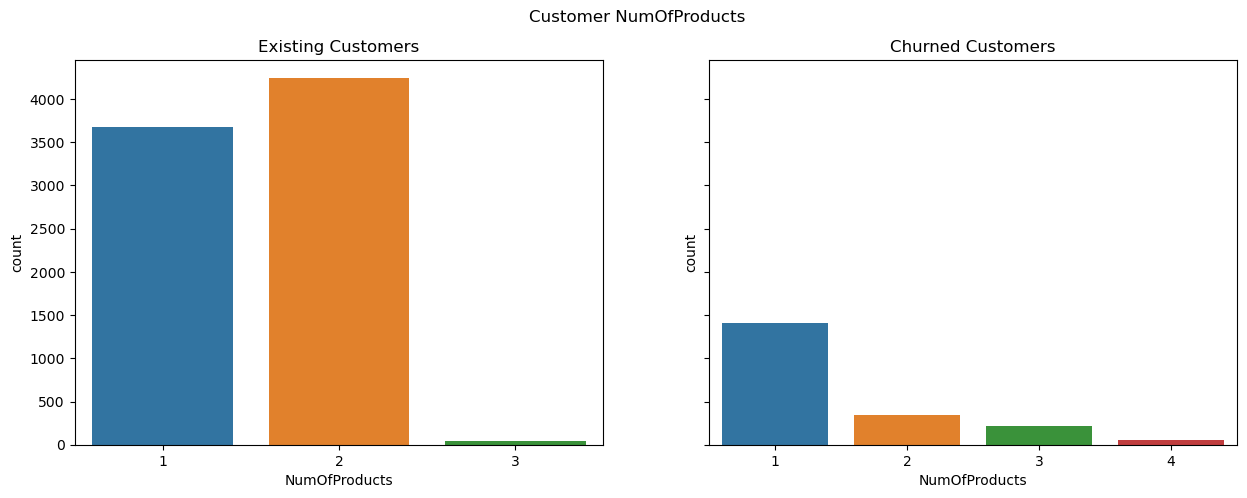

In [ ]:
def bar_feature_comparison(feature):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle(f"Customer {feature}")

    sns.countplot(ax=axes[0], x=data[data["Exited"] == 0][feature])
    axes[0].set_title("Existing Customers")
    sns.countplot(ax=axes[1], x=data[data["Exited"] == 1][feature])
    axes[1].set_title("Churned Customers")
    
bar_feature_comparison("NumOfProducts")

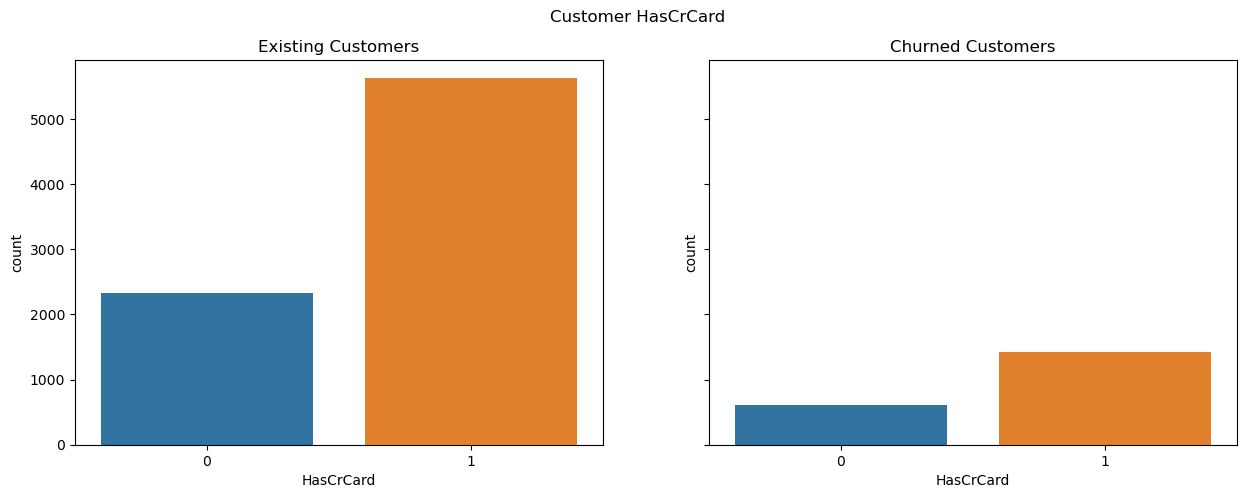

In [ ]:
bar_feature_comparison("HasCrCard")

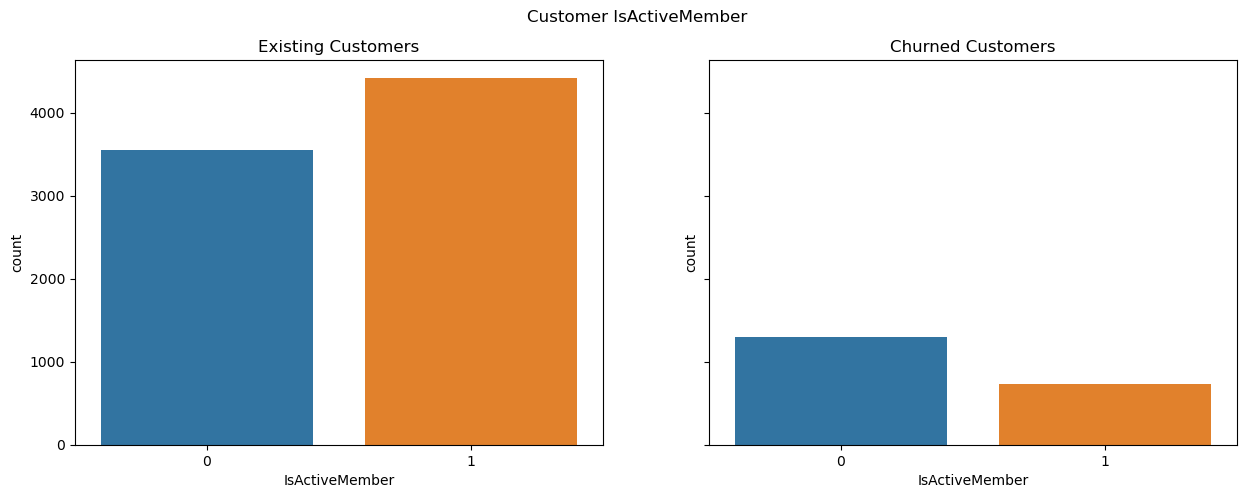

In [ ]:
bar_feature_comparison("IsActiveMember")

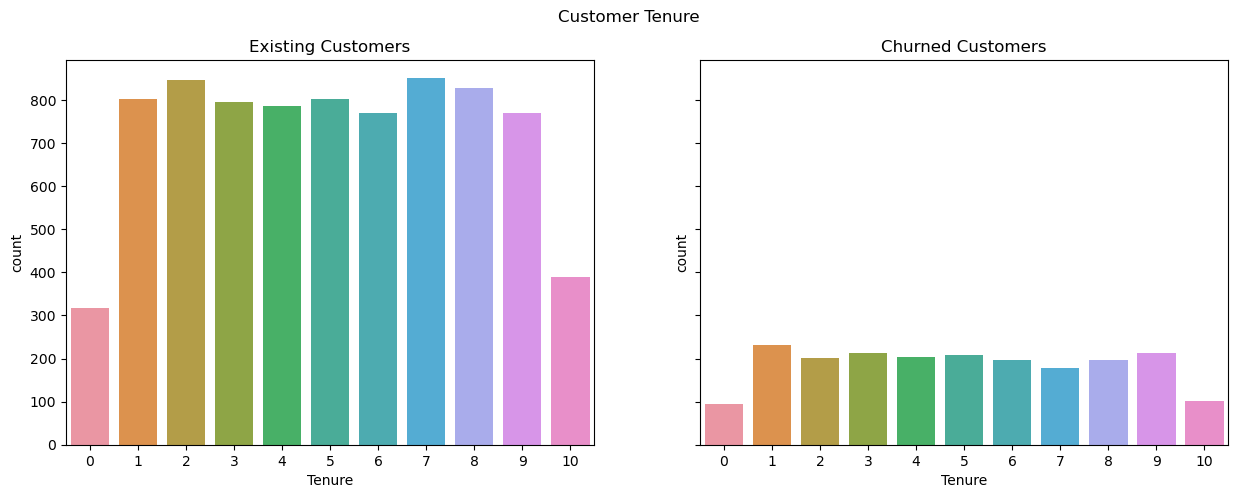

In [ ]:
bar_feature_comparison("Tenure")

In [ ]:
# let us explore the data types for each feature
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [ ]:
# Diving into the discriptive statistics of this dataset
x.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


From the descriptive statistics above, we can conclude that our dataset has no missing values. Each column has a total of 10000 cells which corresponds to the dataset dimensions

### Exploring the data distribution with box and violin plots

$(x - mean)/std$

In [ ]:
# Standardize numerical data to reduce variance
non_categorical = ["Age", "Tenure", "Balance", "CreditScore", "EstimatedSalary", "NumOfProducts"]
num_features = x[non_categorical]
std_num_features = (num_features - num_features.mean())/num_features.std()
std_num_features.head()

,Age,Tenure,Balance,CreditScore,EstimatedSalary,NumOfProducts
0,0.293503,-1.041708,-1.225786,-0.326205,0.021885,-0.911538
1,0.198154,-1.387468,0.117344,-0.440014,0.216523,-0.911538
2,0.293503,1.032856,1.332987,-1.536717,0.240675,2.526930
3,0.007456,-1.387468,-1.225786,0.501496,-0.108912,0.807696
4,0.388852,-1.041708,0.785689,2.063781,-0.365258,-0.911538


In [ ]:
# change dataset shape for box-plot and violin-plot visualizations
def df_massage(category, df=data, df_num=std_num_features):
    features = pd.concat([std_num_features, df[category]], axis=1)
    return pd.melt(features,
                  id_vars=category,
                  var_name="features",
                  value_name="value")

gender_massage = df_massage("Gender")
geo_massage = df_massage("Geography")
class_massage = df_massage("Exited")

### Feature distribution based on gender

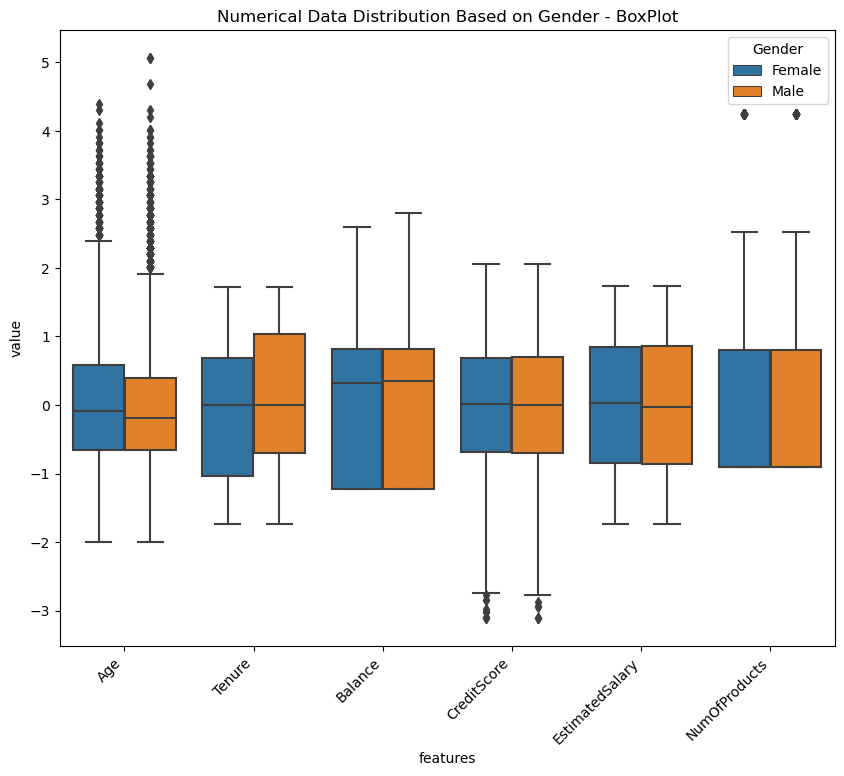

In [ ]:
# create box plots
plt.figure(figsize=(10, 8))
plt.title("Numerical Data Distribution Based on Gender - BoxPlot")
sns.boxplot(x="features",
            y="value",
           hue="Gender",
           data=gender_massage)
plt.xticks(rotation=45, ha="right");

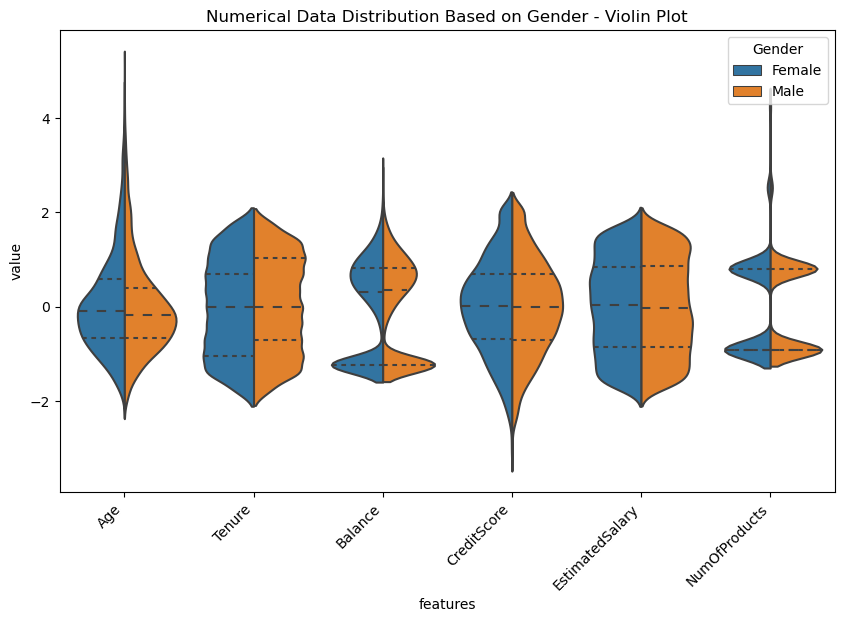

In [ ]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Gender - Violin Plot")
sns.violinplot(x="features",
            y="value",
           hue="Gender",
           data=gender_massage,
              split=True,
              inner="quart")
plt.xticks(rotation=45, ha="right");

From this we can deduce that our numercial data is not biased towards a particular gender

### Feature distribution based on geography

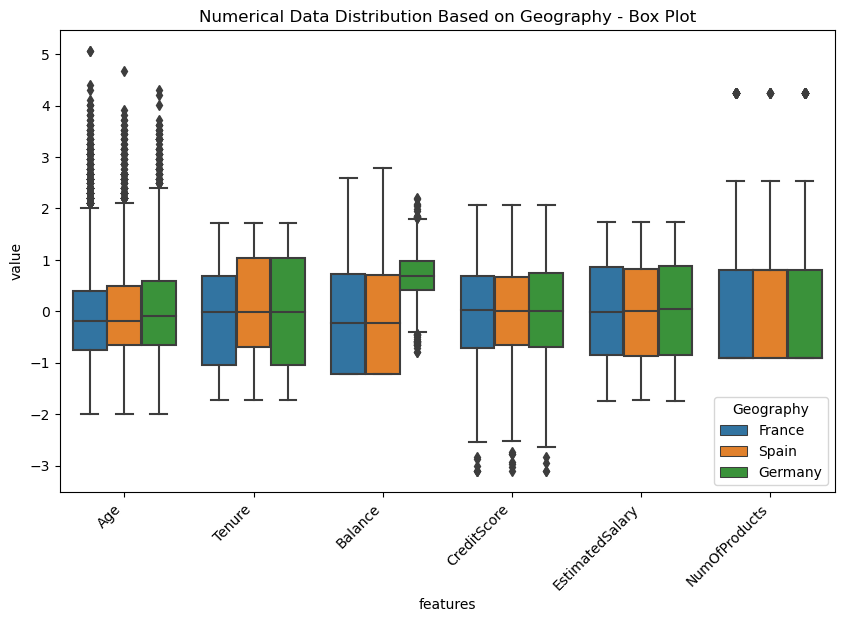

In [ ]:
# create box plots
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Geography - Box Plot")
sns.boxplot(x="features",
            y="value",
           hue="Geography",
           data=geo_massage)
plt.xticks(rotation=45, ha="right");

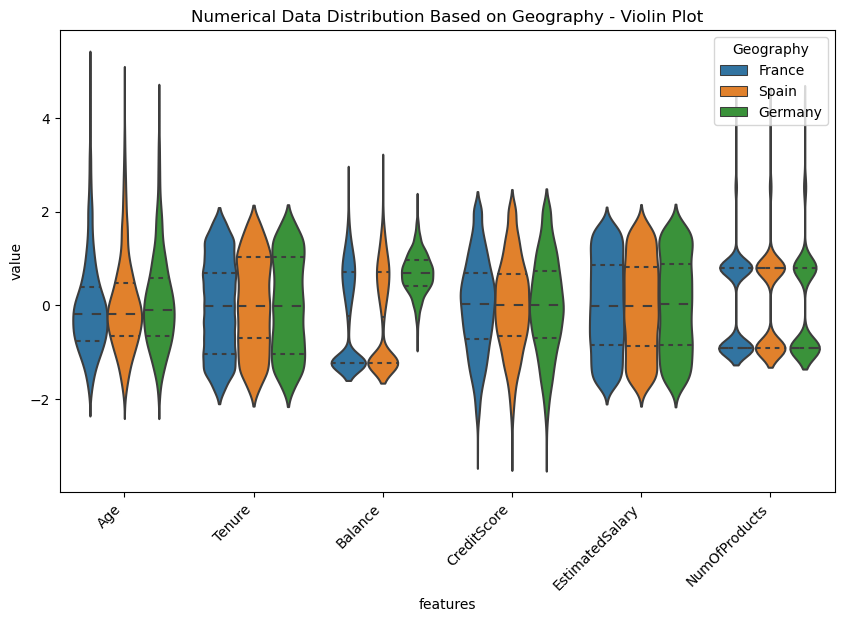

In [ ]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Geography - Violin Plot")
sns.violinplot(x="features",
            y="value",
           hue="Geography",
           data=geo_massage,
              split=False,
              inner="quart")
plt.xticks(rotation=45, ha="right");

### Data distribution based on the Exited (Churn) status

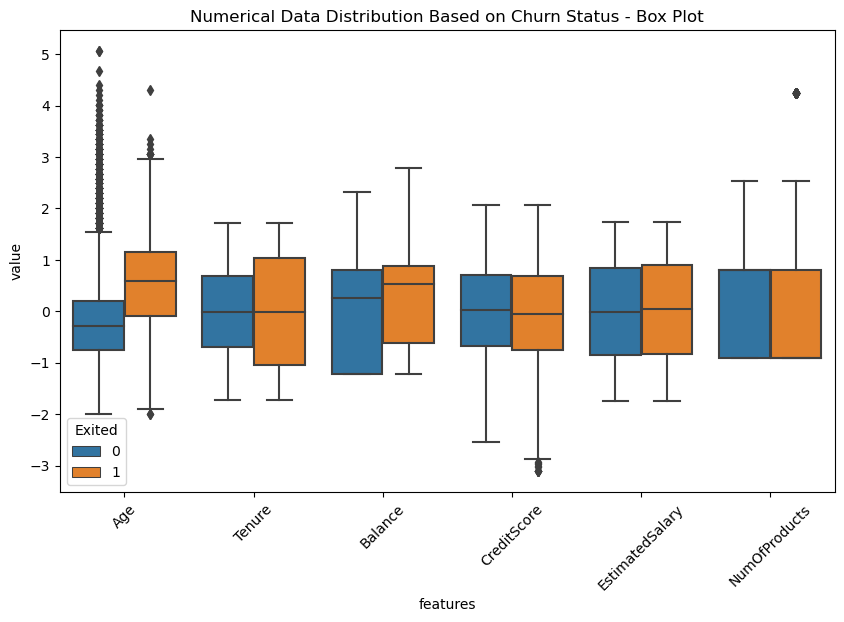

In [ ]:
# create box plots
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Churn Status - Box Plot")
sns.boxplot(x="features",
            y="value",
           hue="Exited",
           data=class_massage)
plt.xticks(rotation=45);

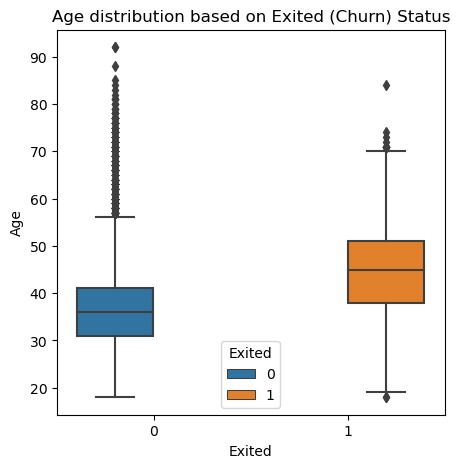

In [ ]:
# customer_churn = data[data["Exited"] == 1]
plt.figure(figsize=(5, 5))
customer_churn = data[["Age", "Exited"]]
plt.title("Age distribution based on Exited (Churn) Status")
sns.boxplot(data=customer_churn, y="Age", x="Exited", hue="Exited");

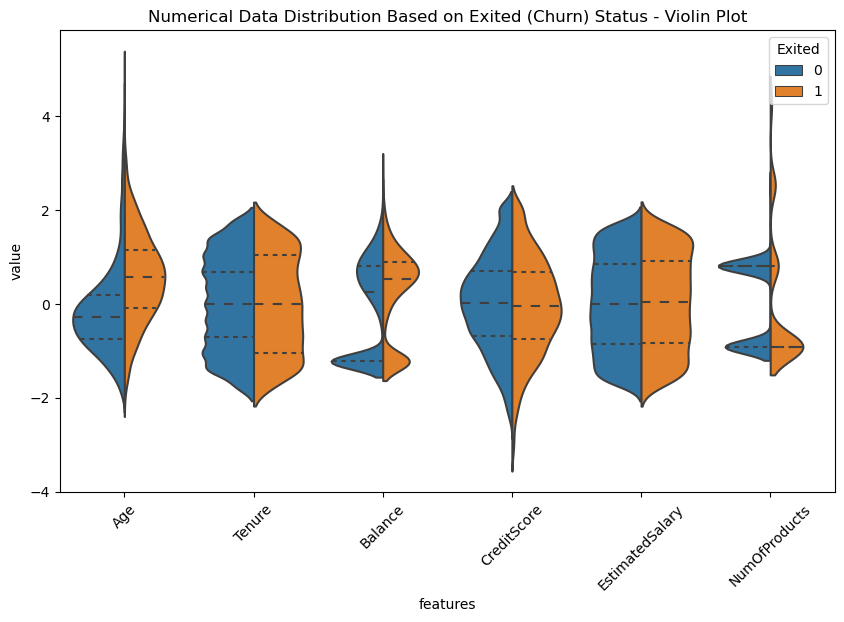

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Exited (Churn) Status - Violin Plot")
sns.violinplot(x="features",
            y="value",
           hue="Exited",
           data=class_massage,
              split=True,
              inner="quart")
plt.xticks(rotation=45);

### Feature comparison (Tenure Vs EstimatedSalary)

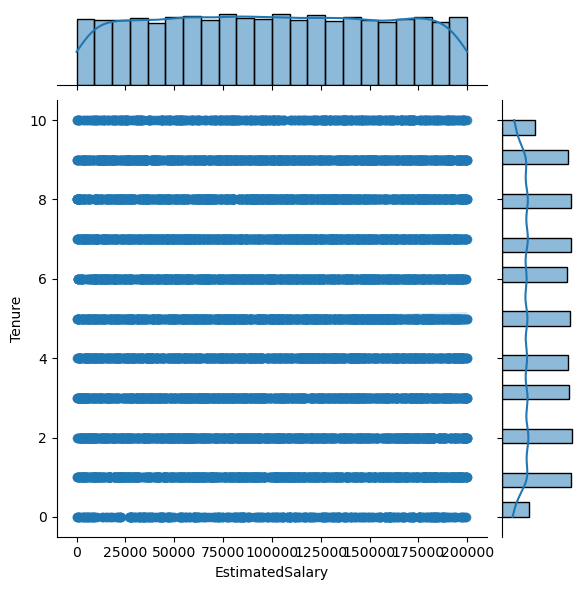

In [ ]:
sns.jointplot(x=x.loc[:, "EstimatedSalary"],
             y=x.loc[:, "Tenure"],
             kind="reg");

### All pairwise scatter plots (Feature Independence Analysis)

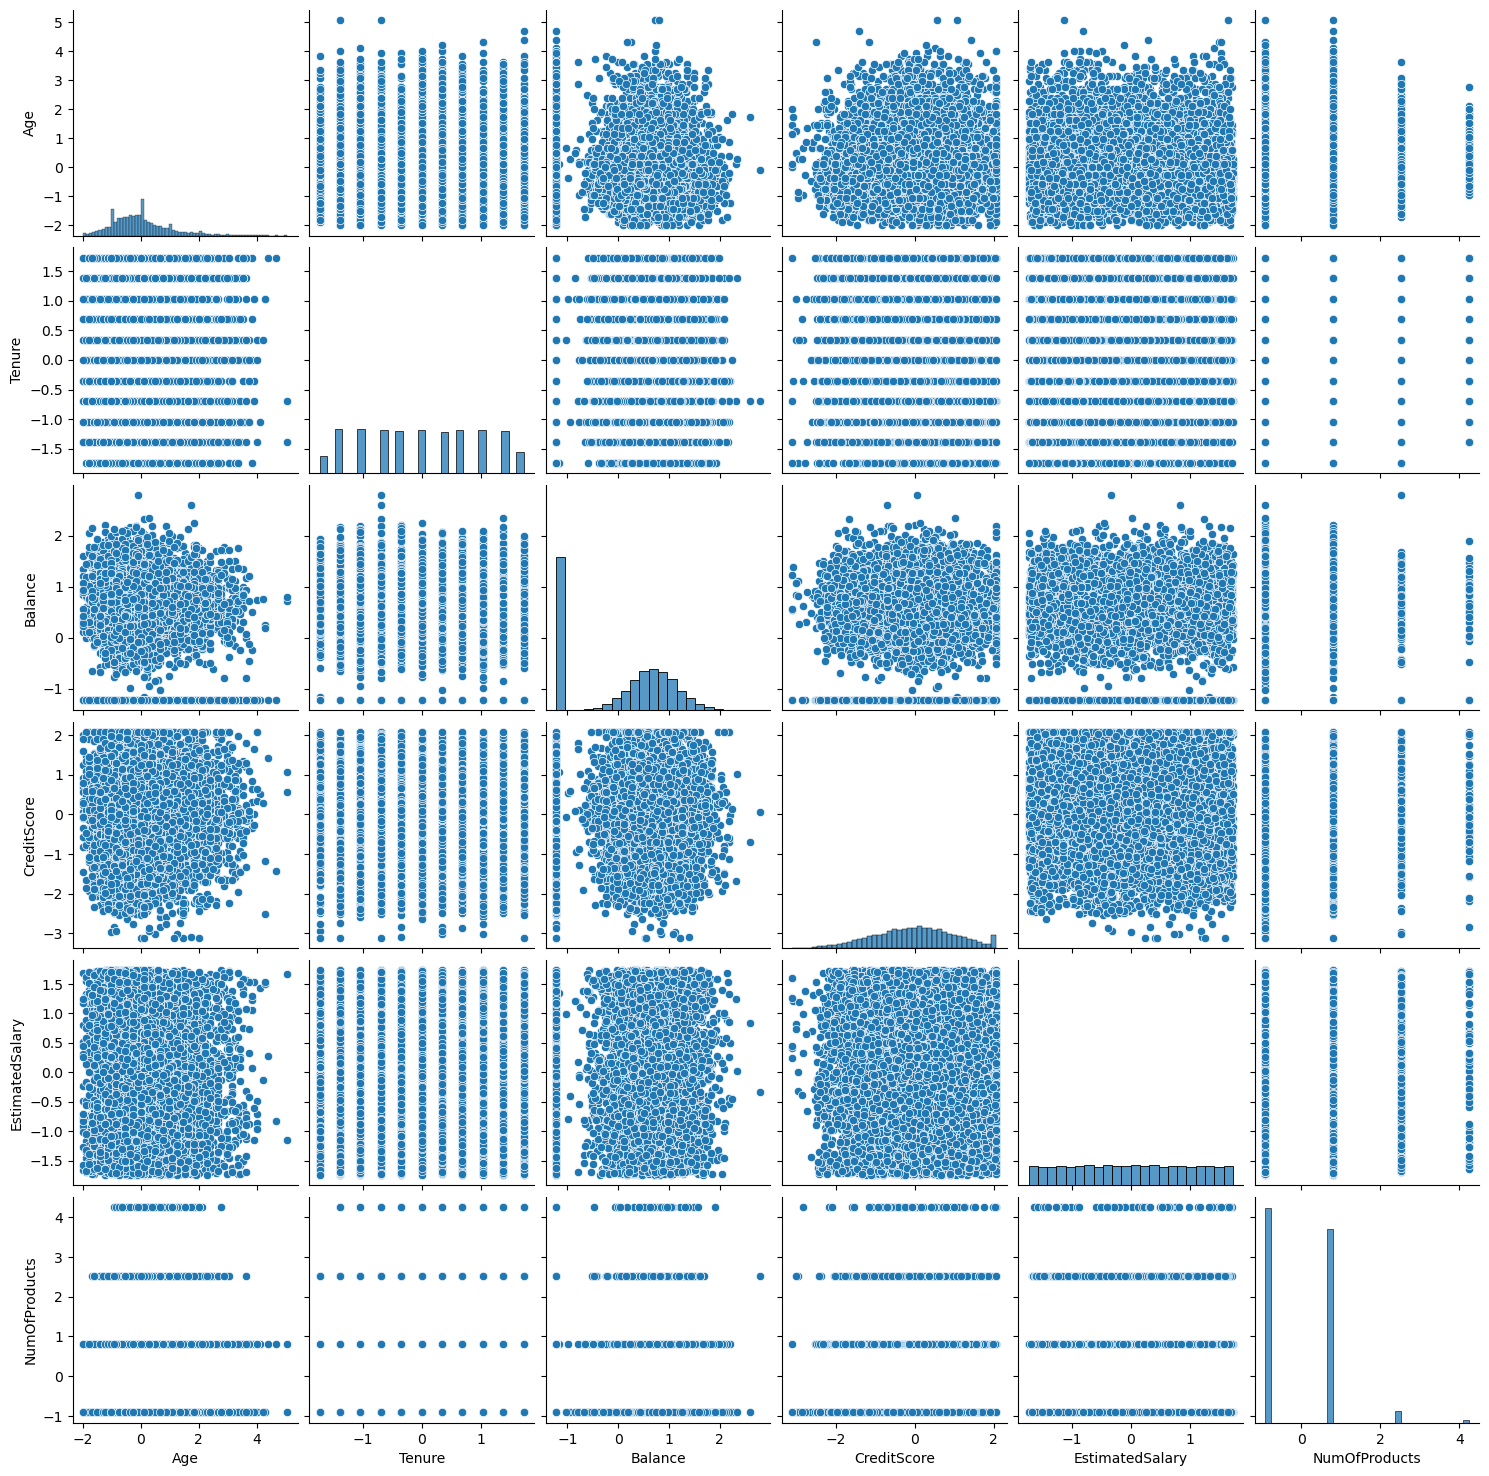

In [ ]:
sns.pairplot(std_num_features)

### All pair-wise correlations

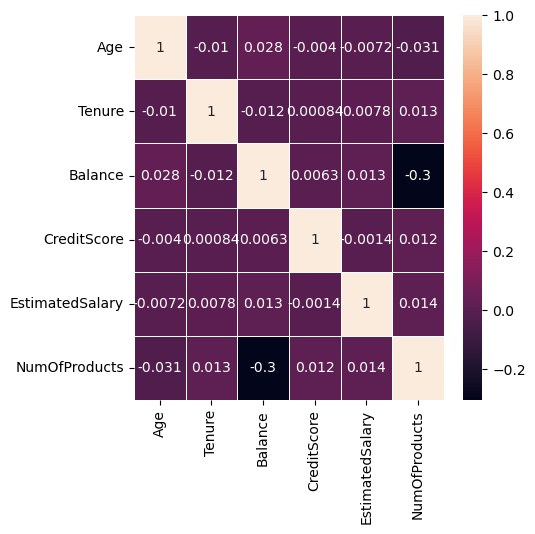

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(std_num_features.corr(), annot=True, linewidth=.5, ax=ax);

In [ ]:
categorical = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]
dataset = pd.concat([std_num_features,
                     data[categorical],
                     y], axis=1)
dataset.head()

,Age,Tenure,Balance,CreditScore,EstimatedSalary,NumOfProducts,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,0.293503,-1.041708,-1.225786,-0.326205,0.021885,-0.911538,France,Female,1,1,1
1,0.198154,-1.387468,0.117344,-0.440014,0.216523,-0.911538,Spain,Female,0,1,0
2,0.293503,1.032856,1.332987,-1.536717,0.240675,2.526930,France,Female,1,0,1
3,0.007456,-1.387468,-1.225786,0.501496,-0.108912,0.807696,France,Female,0,0,0
4,0.388852,-1.041708,0.785689,2.063781,-0.365258,-0.911538,Spain,Female,1,1,0


In [ ]:
np.expand_dims(dataset.Gender.values, axis=1)

array([['Female'],
       ['Female'],
       ['Female'],
       ...,
       ['Female'],
       ['Male'],
       ['Female']], dtype=object)

### Exploring Patterns of Interest

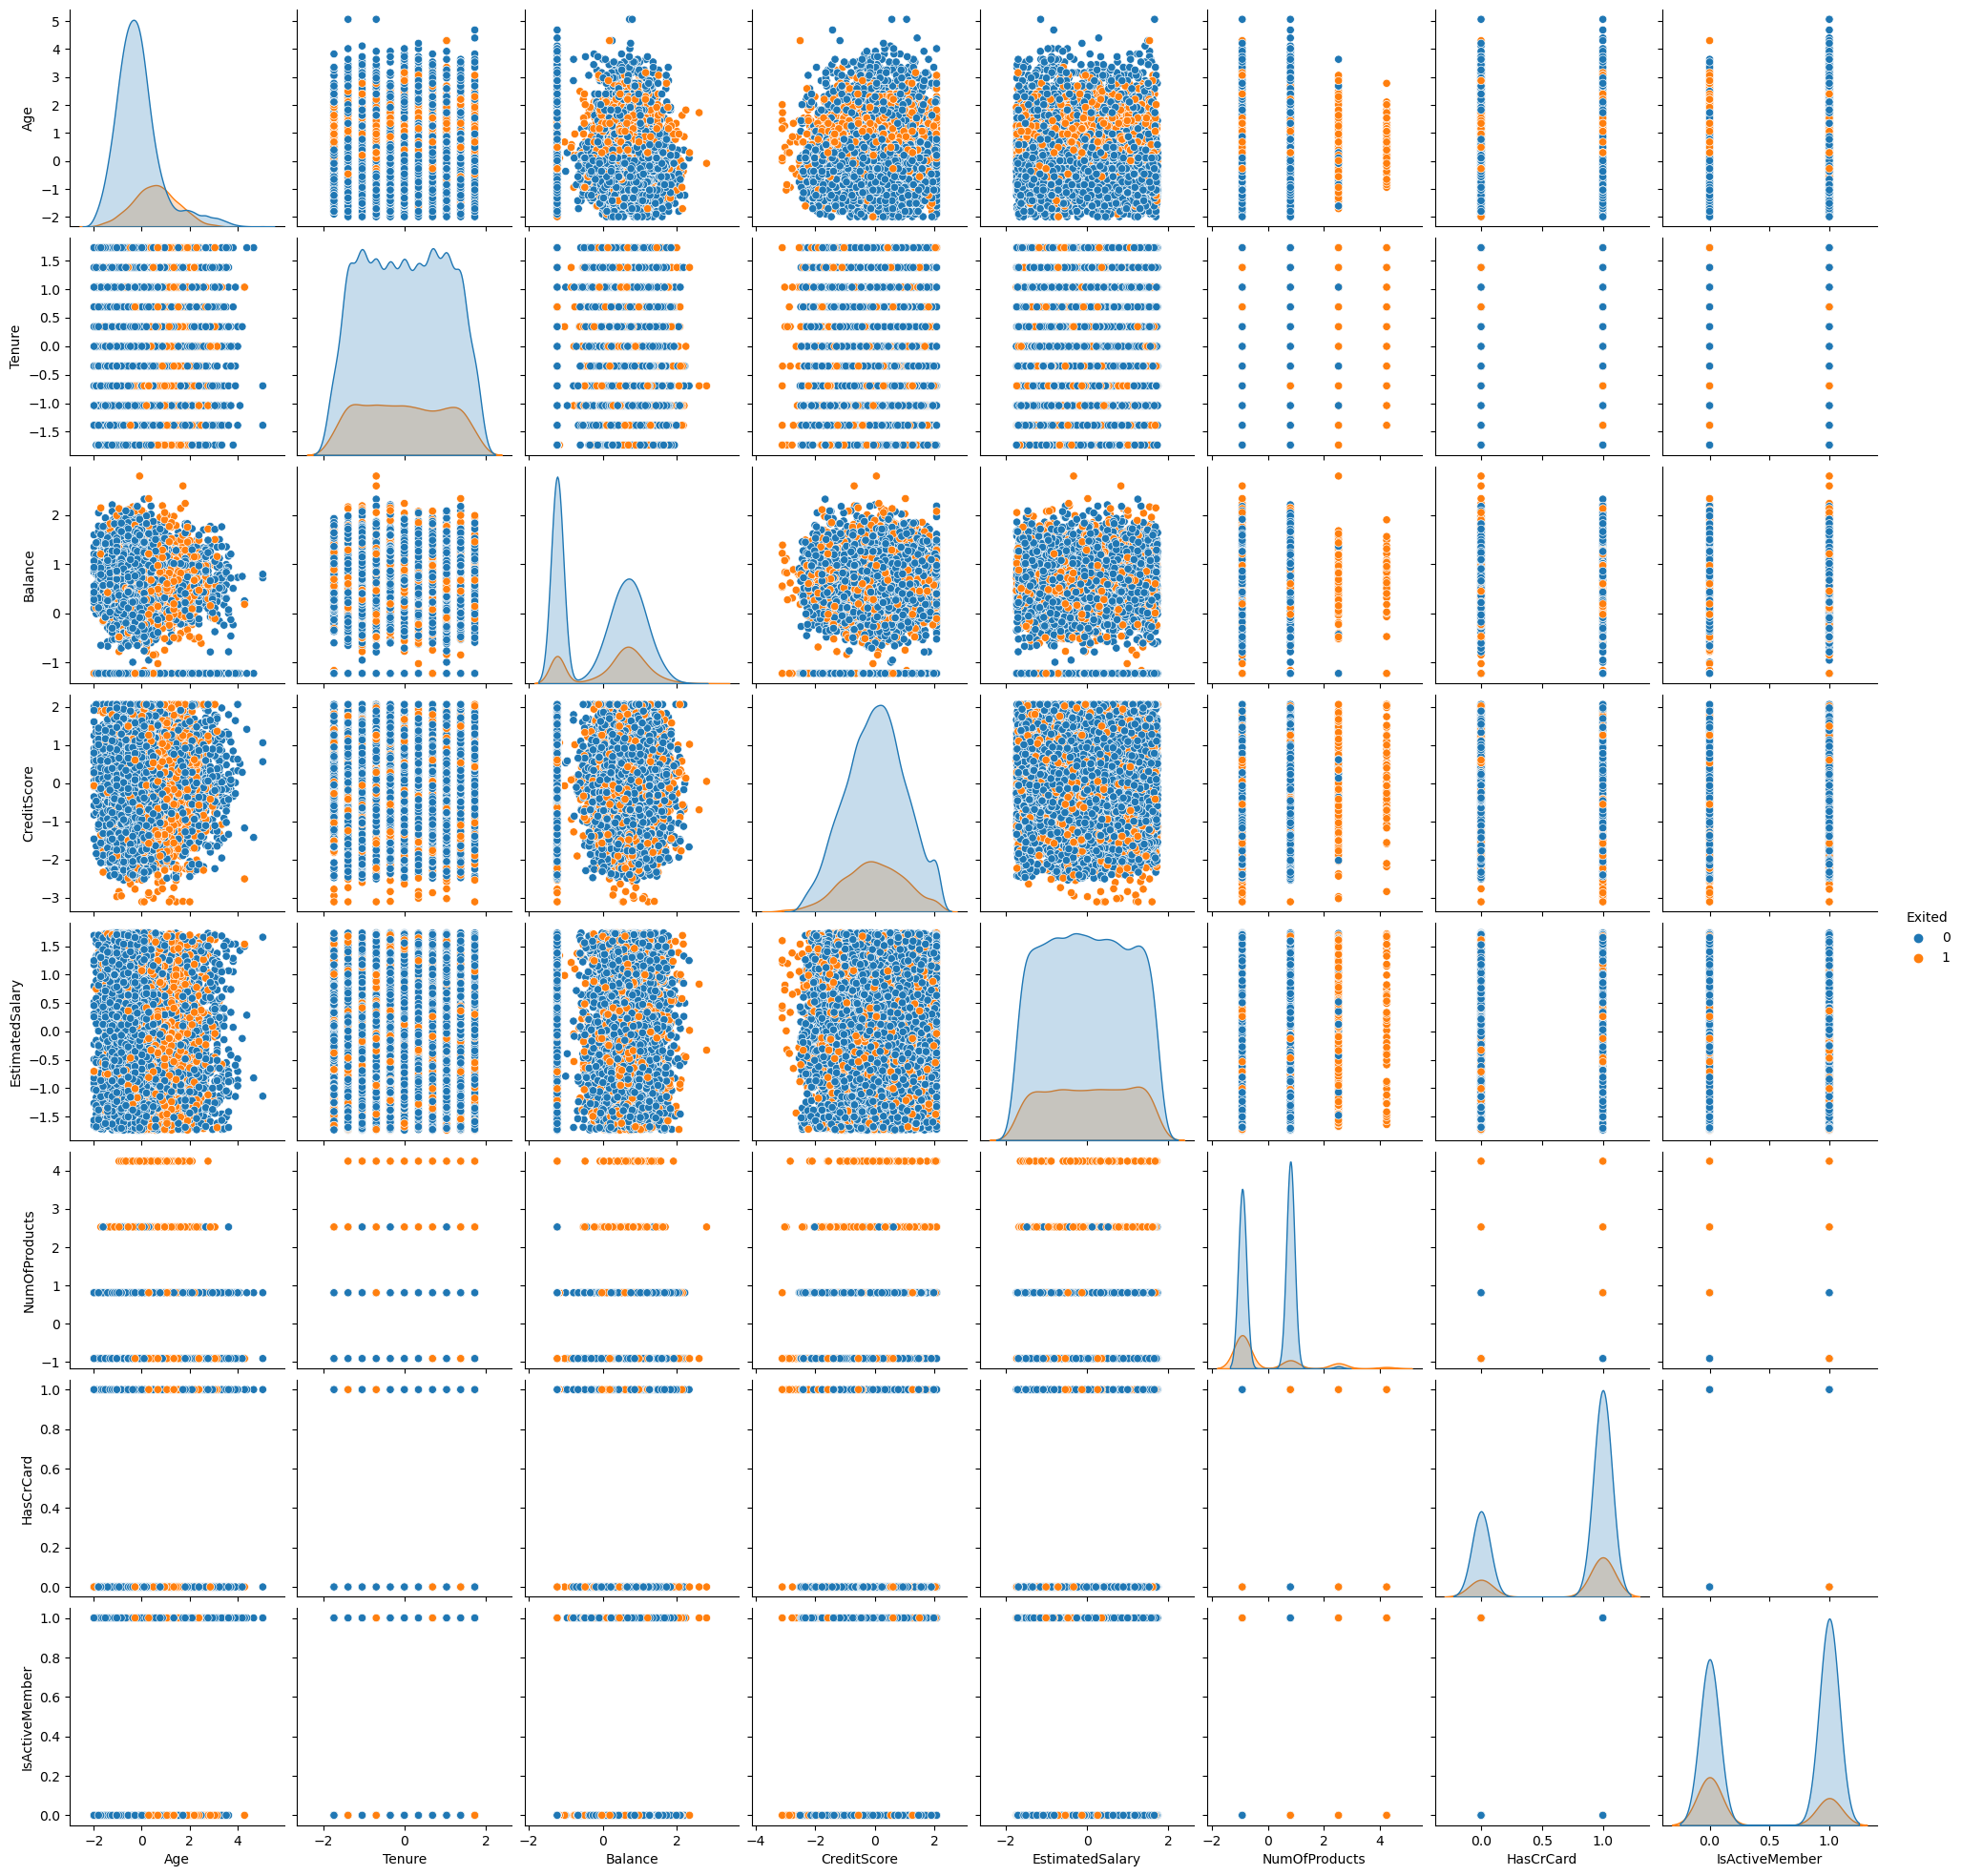

In [ ]:
sns.pairplot(dataset, hue="Exited", kind="scatter");

In [ ]:
X = dataset.drop(["Exited"], axis=1)
y = dataset["Exited"]

In [ ]:
from sklearn.model_selection import train_test_split,\
                                    cross_validate,\
                                    GridSearchCV,\
                                    StratifiedKFold,\
                                    KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder,\
                                  StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [ ]:
dataset = pd.read_csv("Churn Modeling.csv")
dataset.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
y = dataset["Exited"]
X = dataset.loc[:, :"EstimatedSalary"]
col_to_encode = ["Geography", "Gender"]
encoder = LabelEncoder()
for col in col_to_encode:
    X[col] = encoder.fit_transform(X[col])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ("ada_clf", AdaBoostClassifier())])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.86

In [ ]:
prediction = pipe.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2379
           1       0.73      0.52      0.60       621

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [ ]:
# logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2379
           1       0.36      0.06      0.10       621

    accuracy                           0.78      3000
   macro avg       0.58      0.52      0.49      3000
weighted avg       0.71      0.78      0.72      3000



In [ ]:
parameters = {
#     "base_estimator": [LogisticRegression(), DecisionTreeClassifier(), SVC()],
    "n_estimators": np.logspace(0, 2, 100).astype(int),
    "learning_rate": np.logspace(0, -1, 10),
    "algorithm": ["SAMME", "SAMME.R"]
}

clf_optim = GridSearchCV(estimator=AdaBoostClassifier(random_state=0),
            param_grid=parameters)

In [ ]:
# skf = StratifiedKFold(n_splits=3)
_scoring = ["accuracy", "precision", "recall", "f1"]
results = cross_validate(estimator=AdaBoostClassifier(),
                               X=X_test,
                               y=y_test,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
      
{
    "Training Accuracy scores": results['train_accuracy'],
    "Mean Training Accuracy": results['train_accuracy'].mean()*100,
    "Training Precision scores": results['train_precision'],
    "Mean Training Precision": results['train_precision'].mean(),
    "Training Recall scores": results['train_recall'],
    "Mean Training Recall": results['train_recall'].mean(),
    "Training F1 scores": results['train_f1'],
    "Mean Training F1 Score": results['train_f1'].mean(),
    "Validation Accuracy scores": results['test_accuracy'],
    "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
    "Validation Precision scores": results['test_precision'],
    "Mean Validation Precision": results['test_precision'].mean(),
    "Validation Recall scores": results['test_recall'],
    "Mean Validation Recall": results['test_recall'].mean(),
    "Validation F1 scores": results['test_f1'],
    "Mean Validation F1 Score": results['test_f1'].mean()
}

{'Training Accuracy scores': array([0.86833333, 0.87083333, 0.87333333, 0.8675    , 0.87125   ]),
 'Mean Training Accuracy': 87.025,
 'Training Precision scores': array([0.75637394, 0.76638177, 0.75871314, 0.74792244, 0.77581121]),
 'Mean Training Precision': 0.7610404975801401,
 'Training Recall scores': array([0.53722334, 0.54124748, 0.5694165 , 0.54325956, 0.53024194]),
 'Mean Training Recall': 0.5442777633543194,
 'Training F1 scores': array([0.62823529, 0.63443396, 0.65057471, 0.62937063, 0.62994012]),
 'Mean Training F1 Score': 0.634510943631317,
 'Validation Accuracy scores': array([0.86666667, 0.85666667, 0.83833333, 0.865     , 0.86      ]),
 'Mean Validation Accuracy': 85.73333333333333,
 'Validation Precision scores': array([0.72916667, 0.72619048, 0.63917526, 0.75903614, 0.73563218]),
 'Mean Validation Precision': 0.7178401458150921,
 'Validation Recall scores': array([0.56451613, 0.49193548, 0.5       , 0.50806452, 0.512     ]),
 'Mean Validation Recall': 0.515303225806451